In [1]:
import torch
import gpytorch
import numpy as np
import torch.nn as nn
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
points = 50
delta = 2
x1 = np.linspace(0, 2, points)
x2 = x1 + delta
x = np.concatenate((x1, x2), axis=0)
y = np.random.normal(0, 0.1, len(x))

Text(0.5, 1.0, 'Data to test on')

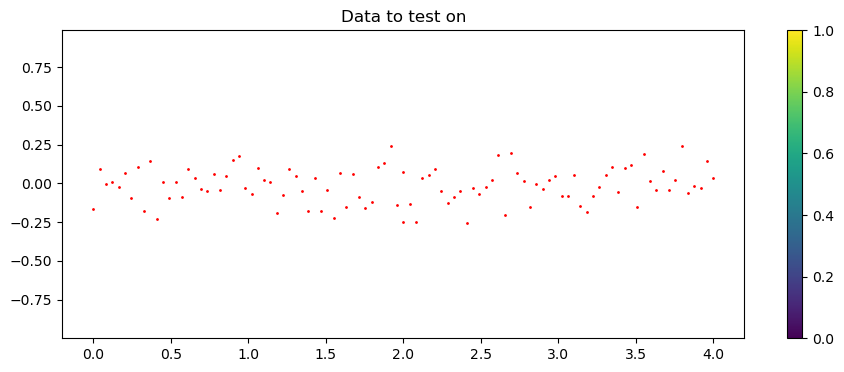

In [3]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plot = ax.scatter(x, y, c='r', s=1)
fig.colorbar(plot)
ax.axis('equal')
ax.set_title(f'Data to test on')

In [4]:
def rbf(x, y, normalizer):
    return np.exp(-((x-y) / normalizer) ** 2)
    
def kernel(x, y, normalizer):
    if x<y:
        if y-x>=normalizer:
            y -= normalizer
    else:
        if x-y>=normalizer:
            x -= normalizer
    return rbf(x, y, normalizer)

cov_matrix = np.asarray([[rbf(p1, p2, delta) for p2 in x] for p1 in x])

In [5]:
kernel_pp = cov_matrix[:points, :points]
kernel_ff = cov_matrix[points:, points:]
kernel_pf = cov_matrix[:points, points:]
additional_noise = 0.01 * np.eye(points)
kernel_with_noise = kernel_pp + additional_noise
posterior_mean = kernel_pf.T @ np.linalg.inv(kernel_with_noise) @ y[points:]
posterior_var = kernel_ff - kernel_pf.T @ np.linalg.inv(kernel_with_noise) @ kernel_pf

In [6]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    plt.figure(figsize=(12, 6))
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

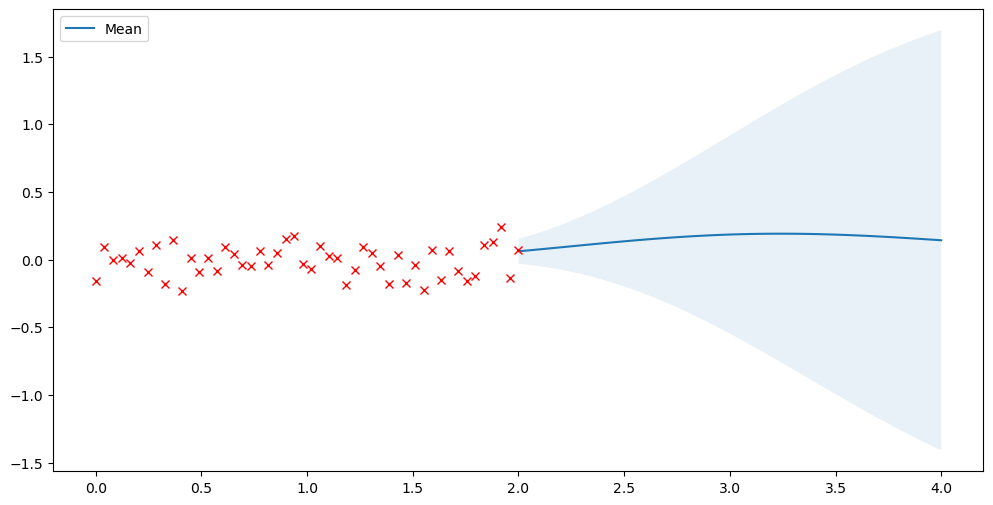

In [7]:
plot_gp(posterior_mean, posterior_var, x[points:], X_train=x[:points], Y_train=y[:points])

In [8]:
np.diag(posterior_var)

array([0.00221254, 0.00283391, 0.00362011, 0.00459938, 0.00580231,
       0.00726161, 0.00901202, 0.01108998, 0.01353343, 0.01638141,
       0.01967372, 0.02345054, 0.0277519 , 0.03261729, 0.03808512,
       0.04419223, 0.05097338, 0.05846072, 0.0666833 , 0.07566661,
       0.0854321 , 0.09599678, 0.10737288, 0.11956747, 0.13258226,
       0.14641338, 0.16105124, 0.1764805 , 0.19268003, 0.20962305,
       0.22727727, 0.24560507, 0.26456383, 0.28410629, 0.30418091,
       0.32473234, 0.34570196, 0.36702833, 0.38864783, 0.41049517,
       0.43250402, 0.4546076 , 0.47673921, 0.49883285, 0.52082377,
       0.54264892, 0.56424753, 0.58556146, 0.60653569, 0.62711859])

In [9]:
indices = np.arange(len(x))
permuted_indices = np.random.permutation(indices)
permuted_indices = np.concatenate((np.sort(permuted_indices[:points]), np.sort(permuted_indices[points:])))
x_new = x[permuted_indices]
y_new = y[permuted_indices]

In [10]:
cov_matrix = np.asarray([[rbf(p1, p2, delta) for p2 in x_new] for p1 in x_new])
kernel_pp = cov_matrix[:points, :points]
kernel_ff = cov_matrix[points:, points:]
kernel_pf = cov_matrix[:points, points:]
additional_noise = 0.01 * np.eye(points)
kernel_with_noise = kernel_pp + additional_noise
posterior_mean = kernel_pf.T @ np.linalg.inv(kernel_with_noise) @ y_new[points:]
posterior_var = kernel_ff - kernel_pf.T @ np.linalg.inv(kernel_with_noise) @ kernel_pf

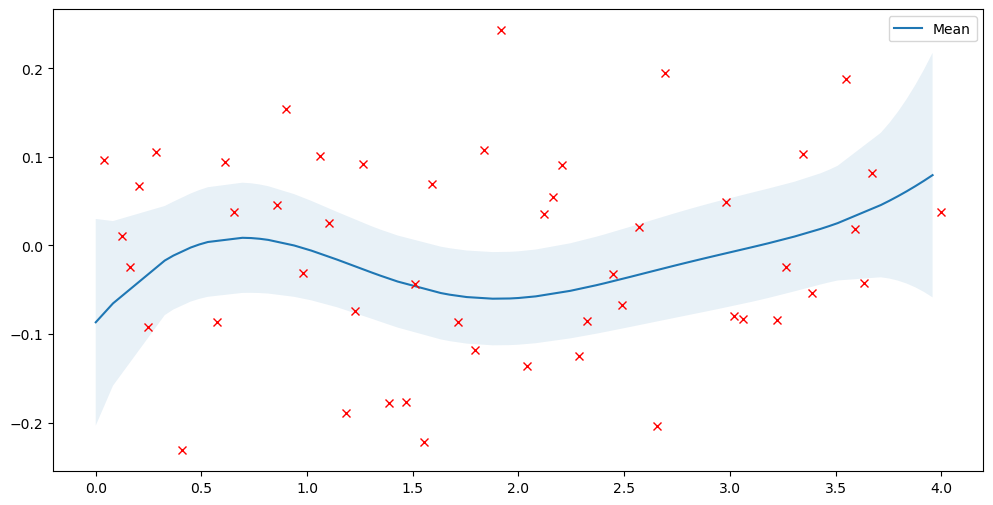

In [11]:
plot_gp(posterior_mean, np.abs(posterior_var), x_new[points:], X_train=x_new[:points], Y_train=y_new[:points])